<a href="https://colab.research.google.com/github/KapilKhanal/AdvLinearAlgebra/blob/master/Project_4_Case_3_An_Interesting_Case_using_Singular_Values_and_Best_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
#from scipy import misc
from scipy import linalg
#from PIL import Image
#import imageio
import matplotlib.pyplot as plt
# importing "random" for random operations 
import random 

#  Singular Value Decomposition and Best Fit

We look at some data generated here from three sources:

*   Case 0:  A known polynomial function $f(x) = 4 - 3x^2 + 5x^6$
*   Case 1:  A known trigonometric function $f(x) = 4 - 2\cos(x) + \cos^2 (x)$
*   Case 2:  A matrix of data $M$ (specified below) with unknown source function
*   Case 3:  An interesting case.

# Overview for Case 3:  An interesting case:

For Case 3, you have the option of completing one of the following tasks:

* **Option A:**  Re-do Case 0 or Case 1 by adding noise to the function.

Using $f$ + (2*random.random()-1)  will add a random number between -1 and 1 to the value of $f$.  How much noise can your method absorb and still produce accurate results?  (e.g. noise with a range of $-1$ to $1$?  noise from a range of $-5$ to $5$?  noise from $-30$ to $30$?)  Which method (best-fit or SVD) accommodates a larger range of error?

* **Option B:**  Best Fit for a plane

Instead of matching a function $x \to f(x)$ using a 8th degree polynomial, make a multivariable function $(x_1,x_2) \to f(x_1,x_2)$ where $f$ is a 3rd degree polynomial in $x_1$ and $x_2$. Generate data based on at least 16 different input points. Modify the procedure for choosing the $M$ matrix, and use Best Fit to find the best fit line. 


BONUS for Option B:  Do this for 3 dimensions, with noise, or modify the SVD solution to fit this option

* **Option C:**  The space of continuous functions of one variable has two different bases:


Given an unknown function, we figured out how to write it using basis of polynomials.  We could also have determined how to write it as a basis of powers of sine and cosine functions. Fit the polynomial $f(x) = 4 - 3x^2 + 5x^6$ to a basis of sine & cosine functions of at most power 4. Plot the original function and the best-fit function.

BONUS for Option C:  Include noise via $f(x)$ + (2*random.random()-1), and find a way to measure the error in your approximation to the function f(x).  What is the effect of this noise on your approximation?


In each case, it may be helpful to re-use data from the previous cases by copy-and-paste into cells below.  Be sure to specify which option you are addressing.

In [0]:
#We'll generate random points of data for our system.
#The actual points for the system will be stored in containers actual_data_x and actual_data_y

actual_data_x = []
actual_data_y = []

#We'll use (cough... cough...) five   data points:

    # pick a random number x for range (1,10)
actual_data_x = np.random.randint(low=1, high=5, size=5)
actual_data_y = 4 - 3*actual_data_x**2 + 5*actual_data_x**6
actual_data_y

array([ 3622,   312, 20436,  3622,   312])

In [0]:
#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, np.cos(x), np.cos(x)**2, np.cos(x)**3, np.cos(x)**4])

M = []
M = np.matrix(M_entries)


#and create the vector b from the data in actual_data_y:
b = []
b = (np.matrix(actual_data_y)).transpose()



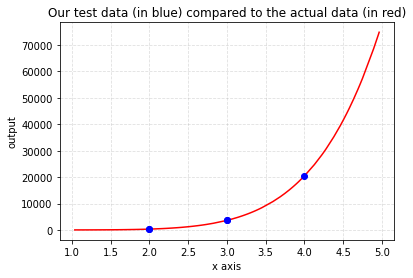

In [0]:
x = sym.symbols('x')

xdata = []
fdata = []

#set up our 100 data points on the interval from (1, 5):
xdata = np.random.uniform(low=1, high=5, size=100)
xdata = np.unique(xdata)
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

# Create the plot in red, and our datapoints in blue:  
plt.plot(xdata,fdata, color='red') + plt.plot(actual_data_x, actual_data_y, 'bo')

# Add a title
plt.title('Our test data (in blue) compared to the actual data (in red)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
fdata

array([3.46585613e+04, 6.47694324e+04, 3.86650155e+03, 1.31436174e+04,
       4.71230146e+03, 4.88918467e+03, 2.48250257e+02, 1.26531160e+04,
       1.08215021e+04, 7.14350286e+02, 5.88686036e+03, 3.13792669e+01,
       2.20393917e+04, 9.90836064e+00, 5.09659548e+02, 2.90523548e+03,
       3.10326663e+03, 2.79130063e+04, 1.61924460e+03, 1.39393336e+04,
       3.19627526e+01, 3.10214850e+03, 1.25029791e+03, 9.82563167e+02,
       2.95232727e+04, 6.98645758e+02, 5.51379273e+03, 3.10853066e+04,
       2.06023731e+04, 8.66676290e+01, 9.66264179e+03, 1.56365834e+03,
       7.42669421e+04, 1.71437520e+04, 1.29615647e+04, 2.88566348e+01,
       4.25405382e+03, 5.37748373e+04, 4.33637261e+04, 2.87708679e+01,
       4.60514864e+04, 2.84673149e+04, 3.27701128e+02, 2.04730628e+01,
       8.99619031e+00, 7.07394050e+01, 9.05379890e+03, 1.83649272e+04,
       2.52994618e+04, 1.56430961e+02, 1.60320583e+03, 3.22643278e+04,
       2.45270750e+04, 5.23163622e+04, 1.92783957e+04, 3.09490060e+01,
      

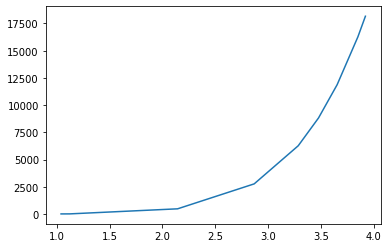

In [0]:
plt.plot(np.unique(xdata),np.unique(fdata))

In [0]:
xdata

array([4.3676836 , 4.84701397, 3.03271553, 3.71675034, 3.13401178,
       3.15325521, 1.92620773, 3.69330764, 3.59847895, 2.29265997,
       3.252064  , 1.36963865, 4.05060568, 1.11567294, 2.16840083,
       2.89218147, 2.92400465, 4.21308643, 2.62501545, 3.75327518,
       1.37388253, 2.92382977, 2.5149869 , 2.41669041, 4.25260964,
       2.28425838, 3.21687537, 4.28926914, 4.00540175, 1.62050228,
       3.5313234 , 2.60986928, 4.95875009, 3.88475259, 3.70813579,
       1.35044976, 3.08120684, 4.69914219, 4.53372966, 1.34977163,
       4.57936026, 4.22690113, 2.0162263 , 1.27360556, 1.09436705,
       1.56729151, 3.49330932, 3.92949268, 4.14469667, 1.78548075,
       2.62069013, 4.31593672, 4.12335963, 4.67767262, 3.96136662,
       1.36646448, 1.16498222, 4.91768149, 1.1663832 , 2.84226769,
       3.93132039, 3.89683125, 2.39845862, 3.78738923, 2.94907688,
       2.42256586, 1.8504546 , 3.96757484, 4.96109508, 1.20129201,
       1.64566701, 3.13118652, 4.39451721, 2.52503316, 3.69502